# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("{} cities have been identified to poll for weather".format(len(cities)))


610 cities have been identified to poll for weather


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"SUCCESS! Details located for: {city}")
    except:
        print(f"ERROR! Details NOT found for: {city}")
        

SUCCESS! Details located for: clyde river
SUCCESS! Details located for: rikitea
SUCCESS! Details located for: krasnoselkup
SUCCESS! Details located for: new norfolk
ERROR! Details NOT found for: taolanaro
SUCCESS! Details located for: cacule
SUCCESS! Details located for: mataura
SUCCESS! Details located for: ribeira grande
SUCCESS! Details located for: arraial do cabo
SUCCESS! Details located for: albany
SUCCESS! Details located for: placido de castro
SUCCESS! Details located for: batanovci
SUCCESS! Details located for: bluff
SUCCESS! Details located for: fairbanks
SUCCESS! Details located for: ponerihouen
ERROR! Details NOT found for: mergui
SUCCESS! Details located for: agadez
SUCCESS! Details located for: tuktoyaktuk
SUCCESS! Details located for: launceston
SUCCESS! Details located for: husavik
SUCCESS! Details located for: atuona
SUCCESS! Details located for: wagrowiec
SUCCESS! Details located for: sorland
SUCCESS! Details located for: norman wells
SUCCESS! Details located for: yel

SUCCESS! Details located for: olinda
SUCCESS! Details located for: reconquista
SUCCESS! Details located for: balkhash
SUCCESS! Details located for: wasilla
ERROR! Details NOT found for: sentyabrskiy
SUCCESS! Details located for: naze
SUCCESS! Details located for: batsfjord
SUCCESS! Details located for: bafq
SUCCESS! Details located for: tilichiki
SUCCESS! Details located for: awjilah
SUCCESS! Details located for: ust-kuyga
SUCCESS! Details located for: upata
SUCCESS! Details located for: cap malheureux
ERROR! Details NOT found for: belushya guba
SUCCESS! Details located for: tocache
SUCCESS! Details located for: codrington
ERROR! Details NOT found for: hihifo
SUCCESS! Details located for: kaeo
SUCCESS! Details located for: paamiut
SUCCESS! Details located for: puerto suarez
SUCCESS! Details located for: mehamn
SUCCESS! Details located for: hualmay
SUCCESS! Details located for: leningradskiy
SUCCESS! Details located for: lakes entrance
SUCCESS! Details located for: cherskiy
SUCCESS! Det

SUCCESS! Details located for: shostka
SUCCESS! Details located for: camana
SUCCESS! Details located for: roma
SUCCESS! Details located for: meadow lake
SUCCESS! Details located for: boyabat
SUCCESS! Details located for: lasa
SUCCESS! Details located for: chernaya kholunitsa
SUCCESS! Details located for: faya
SUCCESS! Details located for: paragould
SUCCESS! Details located for: kapuskasing
SUCCESS! Details located for: bubaque
SUCCESS! Details located for: thayetmyo
SUCCESS! Details located for: lagoa
SUCCESS! Details located for: karratha
SUCCESS! Details located for: sorong
SUCCESS! Details located for: kajansi
SUCCESS! Details located for: ahipara
SUCCESS! Details located for: coihaique
SUCCESS! Details located for: fonte boa
SUCCESS! Details located for: sinop
SUCCESS! Details located for: pisco
SUCCESS! Details located for: ponca city
SUCCESS! Details located for: rio gallegos
SUCCESS! Details located for: sisimiut
SUCCESS! Details located for: ancud
SUCCESS! Details located for: b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [7]:
#Macbook path
Weather_DF.to_csv(r'/Users/aodhnaitelliott/Desktop/WeatherPy/cities.csv', index = False)

Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,clyde river,CA,44.83,100,100,11.50,70.4692,-68.5914,1657572556
1,rikitea,PF,74.73,72,6,13.49,-23.1203,-134.9692,1657572556
2,krasnoselkup,RU,47.23,72,51,10.29,65.7000,82.4667,1657572556
3,new norfolk,AU,45.90,86,86,2.01,-42.7826,147.0587,1657572556
4,cacule,BR,71.08,47,6,3.04,-14.5033,-42.2222,1657572556
...,...,...,...,...,...,...,...,...,...
559,payakumbuh,ID,68.97,96,100,3.00,-0.2202,100.6308,1657572625
560,san francisco del mar,MX,86.02,69,79,12.06,16.2333,-94.6500,1657572625
561,jiazi,CN,80.42,86,2,1.34,22.8779,116.0670,1657572625
562,puerto madryn,AR,43.20,48,2,8.59,-42.7692,-65.0385,1657572625


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Weather_DF.join(badHumidityDF, how='outer')
clean_city_data = Weather_DF.merge(badHumidityDF,on=index,inplace=False).query('index!=index')

In [13]:

City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
City_Data.to_csv(r'/Users/aodhnaitelliott/Desktop/WeatherPy/City_Data.csv', index = False)

City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,clyde river,CA,70.4692,44.83,100,100,11.50,1657572556
1,rikitea,PF,-23.1203,74.73,72,6,13.49,1657572556
2,krasnoselkup,RU,65.7000,47.23,72,51,10.29,1657572556
3,new norfolk,AU,-42.7826,45.90,86,86,2.01,1657572556
4,cacule,BR,-14.5033,71.08,47,6,3.04,1657572556


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

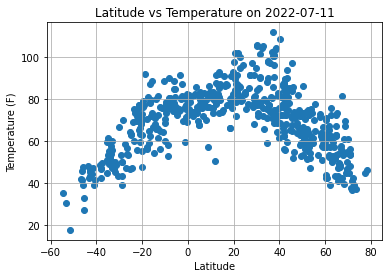

In [14]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')

#display plot!
plt.show()

## Latitude vs. Humidity Plot

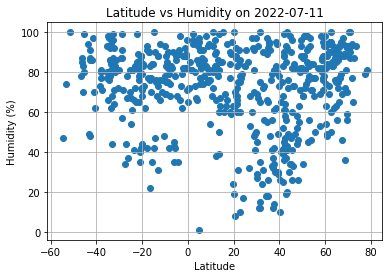

In [15]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

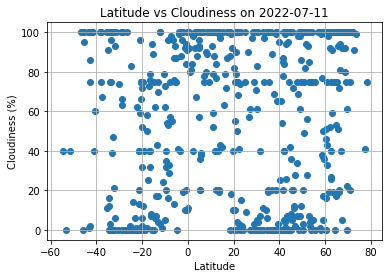

In [16]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

## Latitude vs. Wind Speed Plot

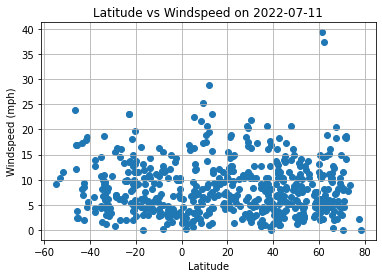

In [17]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

## Linear Regression

In [20]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6398690790292403
y = -0.47x + 90.5


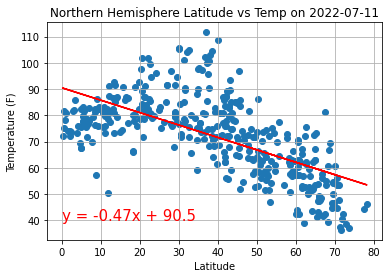

In [22]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Temperature (F)"

#Assign a title to the graph
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6398690790292403
y = -0.47x + 90.5


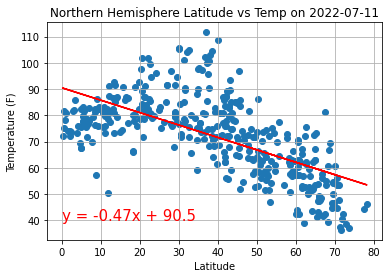

In [25]:
#identify the two data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Temperature (F)"

#Assign a title to graoh 
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.07954398794763627
y = 0.09x + 67.66


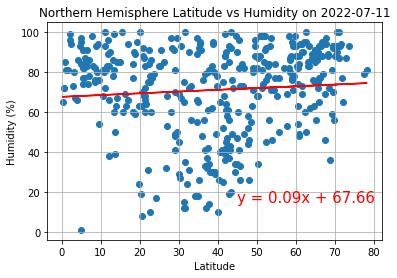

In [26]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.08339811181003519
y = -0.11x + 72.71


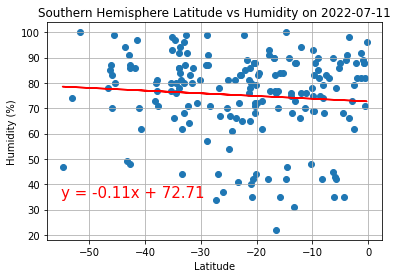

In [27]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.02613342337052291
y = -0.05x + 60.29


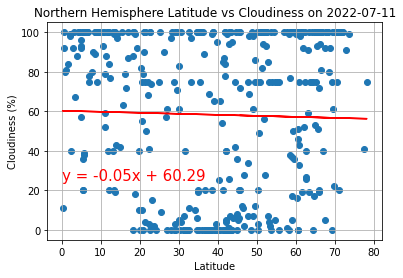

In [28]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.006618531791941383
y = -0.02x + 48.52


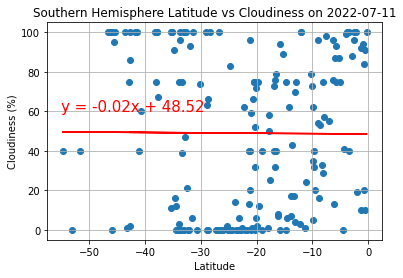

In [29]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.023464017676284258
y = -0.01x + 8.49


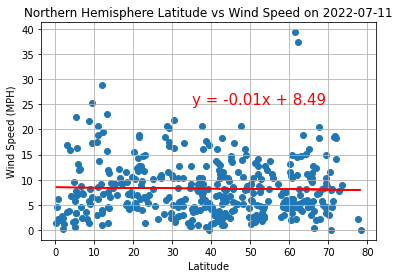

In [30]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.14407019517153674
y = -0.05x + 7.16


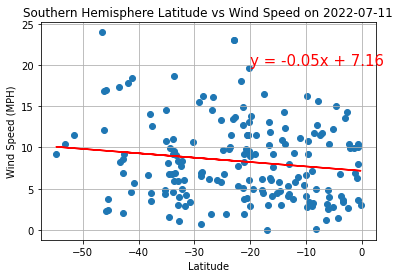

In [38]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -20
regEQplotY = 20
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()